In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv("make_model_date.csv")
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,States,Year,Month.Abbr,Day.Name.Abbr,Weekend
0,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,cessna,140,No,1.0,...,0.0,2.0,VMC,Takeoff,Probable Cause,WA,1982,Jan,Fri,False
1,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,cessna,401B,No,2.0,...,0.0,2.0,IMC,Landing,Probable Cause,NJ,1982,Jan,Fri,False
2,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,north american,NAVION L-17B,No,1.0,...,3.0,0.0,IMC,Cruise,Probable Cause,FL,1982,Jan,Fri,False
3,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,NaN,piper,PA-28-161,No,1.0,...,0.0,1.0,VMC,Approach,Probable Cause,NM,1982,Jan,Fri,False
4,1982-01-01,"TUSKEGEE, AL",United States,Non-Fatal,Substantial,NaN,beech,V35B,No,1.0,...,0.0,1.0,VMC,Landing,Probable Cause,AL,1982,Jan,Fri,False


In [147]:
df['Model'] = df['Model'].str.replace('-', '')

In [148]:
df['Model'] = df['Model'].str.lower()

In [149]:
# POŁĄCZENIE marek
df['Make'] = df['Make'].replace(r'^robinson.*', 'robinson', regex=True)
df['Make'] = df['Make'].replace(r'^air tractor.*', 'air tractor', regex=True)
df['Make'] = df['Make'].replace(r'^douglas.*', 'mcdonnell douglas', regex=True)
df['Make'] = df['Make'].replace(r'^grumman.*', 'grumman', regex=True)
df['Make'] = df['Make'].replace(r'^champion.*', 'champion', regex=True)
df['Make'] = df['Make'].replace(r'^schweizer.*', 'schweizer', regex=True)
df['Make'] = df['Make'].replace(r'^boeing.*', 'boeing', regex=True)
df['Make'] = df['Make'].replace(r'^ ayres.*', ' ayres', regex=True)
df['Make'] = df['Make'].replace(r'^eurocopter.*', 'eurocopter', regex=True)
df['Make'] = df['Make'].replace(r'^bombardier.*', 'bombardier', regex=True)
df['Make'] = df['Make'].replace(r'^cirrus.*', 'cirrus', regex=True)
df['Make'] = df['Make'].replace(r'^ben.*', 'bensen', regex=True)
df['Make'] = df['Make'].replace(r'^legend.*', 'american legend ', regex=True)
df['Make'] = df['Make'].replace(r'^piper.*', 'piper', regex=True)
df['Make'] = df['Make'].replace(r'^bell.*', 'bell', regex=True)
df['Make'] = df['Make'].replace(r'^raytheon.*', 'raytheon', regex=True)
df['Make'] = df['Make'].replace(r'^rockwell.*', 'rockwell', regex=True)


In [109]:
count = df[df['Make'].str.contains('cessna', case=False, na=False)].shape[0]
print("Number of rows with 'cessna' in the 'Make' column:", count)

Number of rows with 'cessna' in the 'Make' column: 25889


In [110]:
count = df[df['Make'].str.contains('north american', case=False, na=False)].shape[0]
print("Number of rows with 'north' in the 'Make' column:", count)


Number of rows with 'north' in the 'Make' column: 391


In [124]:
df.isnull().sum()

Event.Date                    0
Location                     10
Country                       0
Injury.Severity              91
Aircraft.damage            1918
Aircraft.Category         10749
Make                         21
Model                        38
Amateur.Built                20
Number.of.Engines          1759
Engine.Type                2550
Purpose.of.flight          2196
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition           521
Broad.phase.of.flight     15829
Report.Status              2026
States                       58
Year                          0
Month.Abbr                    0
Day.Name.Abbr                 0
Weekend                       0
Model.Capacity                0
Capacity                      0
dtype: int64

In [64]:
#how many missing values in each column there are for all rows that have 'cessna' name in column 'Make'
cessna_df = df[df['Make'] == 'cessna']
missing_values_count = cessna_df.isna().sum()

print(missing_values_count)

Event.Date                  0
Location                    2
Country                     0
Injury.Severity             0
Aircraft.damage           123
Aircraft.Category           0
Make                        0
Model                       1
Amateur.Built               5
Number.of.Engines          23
Engine.Type                13
Purpose.of.flight         163
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition          13
Broad.phase.of.flight       0
Report.Status               0
States                      2
Year                        0
Month.Abbr                  0
Day.Name.Abbr               0
Weekend                     0
dtype: int64


In [132]:
piper_df = df[df['Make'] == 'piper']
missing_values_count = piper_df.isna().sum()

print(missing_values_count)

Event.Date                 0
Location                   0
Country                    0
Injury.Severity            0
Aircraft.damage           64
Aircraft.Category          0
Make                       0
Model                      0
Amateur.Built              4
Number.of.Engines         18
Engine.Type                5
Purpose.of.flight         73
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          9
Broad.phase.of.flight      0
Report.Status              1
States                     0
Year                       0
Month.Abbr                 0
Day.Name.Abbr              0
Weekend                    0
Model.Capacity             0
Capacity                   0
dtype: int64


In [153]:
df = df[~((df['Make'] == 'piper') & df['Broad.phase.of.flight'].isna())]

In [154]:
df = df[~((df['Make'] == 'cessna') & df['Broad.phase.of.flight'].isna())]

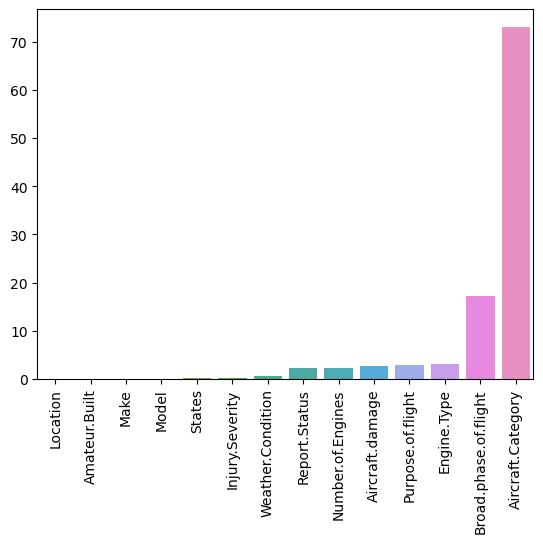

In [155]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);


In [156]:
# data frame with those groups and percentage of missing rows in those groups
missing_values_count = df[df['Aircraft.Category'].isna()].groupby('Make').size().sort_values(ascending=False)

print(missing_values_count)

Make
cessna      18075
piper        9804
beech        3530
bell         2392
grumman      1201
            ...  
halstead        1
halsted         1
haltom          1
hamer           1
zwart           1
Length: 3981, dtype: int64


In [157]:
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0.0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0.0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0.0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0.0)

In [15]:
make_counts = df['Make'].value_counts().iloc[201:251]
print(make_counts)

rotec                            15
christen industries inc          15
nanchang                         15
czech aircraft works spol sro    15
columbia aircraft mfg            15
burkhart grob flugzeugbau        15
aerostar international inc       14
dassault aviation                14
eagle                            14
cameron balloons us              14
howard aircraft corp.            14
pterodactyl                      14
atr                              14
titan                            14
ultramagic                       14
airborne windsports pty ltd      14
kolb                             14
commander                        13
remos aircraft gmbh              13
air & space                      13
naval aircraft factory           13
aerofab inc.                     13
cassutt                          13
mitchell                         13
pietenpol                        13
pzl-bielsko                      12
young                            12
bede aircraft               

In [18]:
value_counts = df['Make'].value_counts()

num_groups = len(value_counts)
print("Number of groups:", num_groups)

Number of groups: 7268


In [42]:
value_counts = df['Make'].value_counts()
missing_rows = df['Make'].isna().sum()

num_groups = len(value_counts) + int(missing_rows > 0)
print("Number of groups:", num_groups)

Number of groups: 7269


In [102]:
# how many missing rows have grups that are created after value_counts function
value_counts = df['Make'].value_counts()
missing_rows = df['Make'].isna().sum()

group_data = pd.DataFrame({'Group': value_counts.index, 'Count': value_counts})
group_data['Percentage of Missing Rows'] = (group_data['Count'] / len(df)) * 100

if missing_rows > 0:
    group_data = group_data.append({'Group': 'Missing', 'Count': missing_rows,
                                    'Percentage of Missing Rows': (missing_rows / len(df)) * 100},
                                   ignore_index=True)

print(group_data)


              Group  Count  Percentage of Missing Rows
0            cessna  20591                   26.747811
1             piper  14209                   18.457562
2             beech   5059                    6.571666
3              bell   3408                    4.427009
4           grumman   1613                    2.095295
...             ...    ...                         ...
7264      van grouw      1                    0.001299
7265     schwarzler      1                    0.001299
7266      rotordyne      1                    0.001299
7267  royse ralph l      1                    0.001299
7268        Missing     21                    0.027279

[7269 rows x 3 columns]


/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_879/1673402977.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_data = group_data.append({'Group': 'Missing', 'Count': missing_rows,


In [158]:

update_info = {
    ('cessna', ('120', '140', '150', '152', '162', '188', '305')): 'cessna_small',
    ('cessna', ('l19', '170', '172', '177', '175', '180', '182', '205', '206', '210', '185', '152', '404', '421', '207', '208', '310', '340', '337', '402', '195', '414', '441', '401', '550', '425', 
               '303', '320', '335', '336', '500', '510', '551', '560', '411', '190', '525', '560', '501', '650', '680')): 'cessna_medium',
    ('piper', ('11', '15', '17', '36', '18', '19', '21', '38', '108', 'j', '25')): 'piper_small',
    ('piper', ('14', '16', '60', '20', '22', '28', '30', '39', '42', '44', '23', '34', '24', '32', '46', '12', '31')): 'piper_medium',
    ('mooney', ('20', '2o', '22')): 'mooney_medium',
    ('mooney', ('10', '18', '2a')): 'mooney_small',
    ('boeing', ('707','717', '727', '737', '747', '757', '767', '777', '787')): 'boeing_large',
    ('boeing', ('a75', 'b75', 'e75', 'd75', 'pt13', 'pt17')): 'boeing_small',
    ('grumman', ('164', 'aa1', 'aa 1')): 'grumman_small',
    ('grumman', ('aa5', 'aa 5', '7', '15', '44', 'tb', '21', '73')): 'grumman_medium',
    ('bellanca', ('c',)): 'bellanca_small',
    ('bellanca', ('17', '14', 'bl')): 'bellanca_medium',
    ('robinson', ('r44', 'r22', '22', 's12')): 'robinson_small',
    ('robinson', ('r66',)): 'robinson_medium',
    ('schweizer', ('269', '164', '12', '13', '23', '26', '22', '32', '34')): 'schweizer_small',
    ('schweizer', ('300',)): 'schweizer_medium',
    ('aeronca', ('7', '11', '58', '65', 'c3')): 'aeronca_small',
    ('aeronca', ('15',)): 'aeronca_medium',
    ('mcdonnell douglas', ('dc', '88', '82', '10', '11', '54', '80', '83', '90', '81')): 'douglas_large',
    ('mcdonnell douglas', ('600', '369', '500')): 'douglas_medium',
    ('stinson', ('108', '77', '10', '19', 'sr', '180', '181')): 'stinson_medium',
    ('stinson', ('l5', 'l 5')): 'stinson_small',
    ('aero commander', ('a9', 's2')): 'aero_small',
    ('aero commander', ('100', '112', '114', '200', '400', '500', '520', '560', '68', '69')): 'aero_medium',
    ('taylorcraft', ('bc', 'dc', 'l2', 'bl', 'bf', '21', '19')): 'taylorcraft_small',
    ('taylorcraft', ('20', '18')): 'taylorcraft_medium',
    ('de havilland', ('dhc8', 'dhc7')): 'de havilland_large',
    ('de havilland', ('dhc2', 'dhc3', 'dhc6')): 'de havilland_medium',
    ('north american', ('t6', 't 6', 'snj', '51', '28')): 'namerican_small',
    ('north american', ('navion', 'na', 'b25')): 'namerican_medium',
    ('aerospatiale', ('atr',)): 'aerospatiale_large',
    ('aerospatiale', ('sa', 'as', 'tb', '350', '316', '355', '300')): 'aerospatiale_medium',
    ('rockwell', ('s2', 'a9')): 'rockwell_small',
    ('rockwell', ('100', '112', '114', '680', '690', '500', '265')): 'rockwell_medium',
    ('luscombe', ('11',)): 'luscombe_medium',
    ('luscombe', ('8',)): 'luscombe_small',
}

def update_model(row):
    make = row['Make']
    model = str(row['Model'])
    
    for condition, info in update_info.items():
        if make == condition[0] and any(x in model for x in condition[1]):
            return info
    
    return model

df['Model.Capacity'] = df.apply(update_model, axis=1)

In [159]:
#
df.loc[df['Make'] == 'beech', 'Model.Capacity'] = 'beech_medium'
df.loc[df['Make'] == 'bell', 'Model.Capacity'] = 'bell_medium'
df.loc[df['Make'] == 'hughes', 'Model.Capacity'] = 'hughes_medium'
df.loc[df['Make'] == 'air tractor', 'Model.Capacity'] = 'air_tractor_small'
df.loc[df['Make'] == 'maule', 'Model.Capacity'] = 'maule_medium'
df.loc[df['Make'] == 'champion', 'Model.Capacity'] = 'champion_small'
df.loc[df['Make'] == 'hiller', 'Model.Capacity'] = 'hiller_medium'
df.loc[df['Make'] == 'enstrom', 'Model.Capacity'] = 'enstrom_medium'
df.loc[df['Make'] == 'ayres', 'Model.Capacity'] = 'ayres_small'
df.loc[df['Make'] == 'corp', 'Model.Capacity'] = 'corp_medium'
df.loc[df['Make'] == 'eurocopter', 'Model.Capacity'] = 'eurocopter_medium'
df.loc[df['Make'] == 'cirrus design corp', 'Model.Capacity'] = 'cirrus_medium'
df.loc[df['Make'] == 'cirrus', 'Model.Capacity'] = 'cirrus_medium'
df.loc[df['Make'] == 'sikorsky', 'Model.Capacity'] = 'sikorsky_medium'


In [139]:
df['Model.Capacity'].value_counts().head(30)

cessna_medium          14287
cessna_small            6266
piper_medium            5706
piper_small             5365
beech_medium            5059
bell_medium             3408
robinson_small          1318
mooney_medium           1272
grumman_small           1177
boeing_large            1086
hughes_medium            874
air_tractor_small        870
schweizer_small          747
aeronca_small            584
maule_medium             577
douglas_large            563
champion_small           514
stinson_medium           413
luscombe_small           405
boeing_small             400
grumman_medium           395
cirrus_medium            387
taylorcraft_small        371
hiller_medium            344
aerospatiale_medium      305
namerican_small          290
enstrom_medium           285
aero_medium              274
eurocopter_medium        261
de havilland_medium      258
Name: Model.Capacity, dtype: int64

In [131]:
north_american_df = df[df['Make'] == 'north american']

# Use the value_counts() function to get the count of each unique model
model_counts = north_american_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'north american' brand:")
print(top_20_models)

Top 20 models from the 'north american' brand:
namerican_small         290
namerican_medium         68
f86                       1
tb 25n                    1
harvard mk                1
ov10a                     1
t39a                      1
harvard 2                 1
harvard mk iv             1
harvard mk ii             1
harvard mkii              1
p82b                      1
f86f                      1
t2c                       1
british harvard mkii      1
047b                      1
at                        1
Name: Model.Capacity, dtype: int64


In [34]:
cessna_df = df[df['Make'] == 'cessna']

# Use the value_counts() function to get the count of each unique model
model_counts = cessna_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'cessna' brand:")
print(top_20_models)

Top 20 models from the 'cessna' brand:
cessna_medium    18645
cessna_small      7153
t21ol                3
t240                 3
t50                  3
750                  3
tri82                2
400                  2
t37b                 2
t41b                 1
o2a                  1
21ok                 1
15of                 1
u3a                  1
nan                  1
c37                  1
01a                  1
cl60                 1
350                  1
lc126c               1
o1  a                1
o 1e                 1
t21or                1
t50a17               1
citation sii         1
21on                 1
t21om                1
183p                 1
31                   1
17oa                 1
p21o                 1
c114a                1
304a                 1
50m                  1
552                  1
31oq                 1
c377a                1
a37a                 1
165                  1
33tc                 1
201a                 1
145               

In [41]:
piper_df = df[df['Make'] == 'piper']

# Use the value_counts() function to get the count of each unique model
model_counts = piper_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'piper' brand:")
print(top_20_models)

Top 20 models from the 'piper' brand:
piper_medium          7529
piper_small           6623
e2                       2
seneca                   2
pa                       2
pa61p                    1
aztec                    1
l4h                      1
pa3o                     1
l3                       1
pa3                      1
l4                       1
aerostar 6               1
titan tornado ii d       1
Name: Model.Capacity, dtype: int64


In [83]:
beech_df = df[df['Make'] == 'beech']

# Use the value_counts() function to get the count of each unique model
model_counts = beech_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'beech' brand:")
print(top_20_models)

Top 20 models from the 'beech' brand:
beech_medium    5059
Name: Model.Capacity, dtype: int64


In [101]:
boeing_df = df[df['Make'] == 'boeing']

# Use the value_counts() function to get the count of each unique model
model_counts = boeing_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'boeing' brand:")
print(top_20_models)

Top 20 models from the 'boeing' brand:
boeing_large    1085
boeing_small     349
b17g               3
dhc8102            3
md11f              2
dc982              2
md11               2
369e               2
a 75n1             2
n2s3               2
b17                2
kc135a             2
pt 17              2
75                 2
vc137bbn           2
75a                2
hpb377             1
cv2                1
pt 13              1
md88               1
md                 1
dc10               1
b744               1
bv234              1
1942               1
md1010f            1
s307               1
md82               1
ec135              1
369d               1
hu369oh6a          1
720025             1
md600n             1
75n1               1
n253               1
dhc6300            1
ch47d              1
Name: Model.Capacity, dtype: int64


In [44]:
mooney_df = df[df['Make'] == 'mooney']

# Use the value_counts() function to get the count of each unique model
model_counts = mooney_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'mooney' brand:")
print(top_20_models)

Top 20 models from the 'mooney' brand:
mooney_medium      1272
mooney_small         15
231                   3
21                    1
mk21                  1
rans s7 courier       1
Name: Model.Capacity, dtype: int64


In [49]:
grumman_df = df[df['Make'] == 'grumman']

# Use the value_counts() function to get the count of each unique model
model_counts = grumman_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'grumman' brand:")
print(top_20_models)

Top 20 models from the 'grumman' brand:
grumman_small     1177
grumman_medium     395
ag5b                 3
ts2a                 3
f14a                 2
f8f1                 2
c1a                  2
tr2                  2
g111                 2
f6f5                 2
fm2                  2
hu16c                2
f6f                  1
s2f1                 1
gulfstream iii       1
us2c                 1
s2b                  1
tmb3e                1
aa                   1
g58a                 1
f9f2                 1
hu16                 1
gs2f                 1
a6e                  1
ts2f                 1
aalc                 1
agcatg114            1
agcat                1
american aab         1
scan type 30         1
ov1                  1
Name: Model.Capacity, dtype: int64


In [ ]:
bellanca_df = df[df['Make'] == 'bellanca']

# Use the value_counts() function to get the count of each unique model
model_counts = bellanca_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'bellanca' brand:")
print(top_20_models)

In [59]:
robinson_df = df[df['Make'] == 'robinson']

# Use the value_counts() function to get the count of each unique model
model_counts = robinson_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'robinson' brand:")
print(top_20_models)

Top 20 models from the 'robinson' brand:
robinson_small     1318
robinson_medium      25
cozy mark iv          2
avid flyer            1
wenoso                1
tierra ii             1
beta ii               1
bearhawk              1
Name: Model.Capacity, dtype: int64


In [64]:
schweizer_df = df[df['Make'] == 'schweizer']

# Use the value_counts() function to get the count of each unique model
model_counts = schweizer_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'schweizer' brand:")
print(top_20_models)

Top 20 models from the 'schweizer' brand:
schweizer_small     720
schweizer_medium     14
sgs 2 33a             3
84                    1
ag cat                1
asw20                 1
tg3a                  1
g167b                 1
sgs 28                1
sgs 1 35              1
Name: Model.Capacity, dtype: int64


In [65]:
aeronca_df = df[df['Make'] == 'aeronca']

# Use the value_counts() function to get the count of each unique model
model_counts = aeronca_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'aeronca' brand:")
print(top_20_models)

Top 20 models from the 'aeronca' brand:
aeronca_small     584
aeronca_medium     41
l3b                 3
60tf                1
50f                 1
l3c                 1
kca                 1
champion            1
l 3b                1
l16a                1
Name: Model.Capacity, dtype: int64


In [68]:
mcdonnell_douglas_df = df[df['Make'] == 'mcdonnell douglas']

# Use the value_counts() function to get the count of each unique model
model_counts = mcdonnell_douglas_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'mcdonnell_douglas' brand:")
print(top_20_models)

Top 20 models from the 'mcdonnell_douglas' brand:
douglas_large           563
douglas_medium           91
a4n                       2
a26c                      2
520n                      2
a26b                      2
c47                       2
oh6a                      1
ah64d                     1
md520n                    1
f/a18c                    1
adventure air ampib       1
ad4dw                     1
r4d8                      1
vans rv8                  1
lancair ivp               1
a4l                       1
ad4n                      1
ta4k                      1
b26b                      1
a20g                      1
269a                      1
269c                      1
rb26c                     1
f18a                      1
269b                      1
a4a                       1
f4                        1
varieze                   1
xtc                       1
tb26b                     1
rf4c                      1
quickie                   1
ad4na                     

In [71]:
filtered_df = df[df['Make'] == 'stinson']

# Use the value_counts() function to get the count of each unique model
model_counts = filtered_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'stinson' brand:")
print(top_20_models)

Top 20 models from the 'stinson' brand:
stinson_medium    413
stinson_small      19
st75                2
hww75               1
voyager 150         1
jr. s               1
hw75                1
Name: Model.Capacity, dtype: int64


In [21]:
taylorcraft_df = df[df['Make'] == 'taylorcraft']

# Use the value_counts() function to get the count of each unique model
model_counts = taylorcraft_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'taylorcraft' brand:")
print(top_20_models)

Top 20 models from the 'taylorcraft' brand:
taylorcraft_small     371
15a                     4
unknown                 1
df65                    1
h2                      1
j2                      1
taylorcraft_medium      1
12m                     1
l 2m                    1
Name: Model.Capacity, dtype: int64


In [74]:
aero_commander_df = df[df['Make'] == 'aero commander']

# Use the value_counts() function to get the count of each unique model
model_counts = aero_commander_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'aero commander' brand:")
print(top_20_models)

Top 20 models from the 'aero commander' brand:
aero_medium     274
aero_small      113
callair a 9       2
callair b1a       1
720               1
str               1
600               1
700               1
ac50              1
callair           1
callair a 9b      1
Name: Model.Capacity, dtype: int64


In [77]:
aerospatiale_df = df[df['Make'] == 'aerospatiale']

# Use the value_counts() function to get the count of each unique model
model_counts = aerospatiale_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'aerospatiale' brand:")
print(top_20_models)

Top 20 models from the 'aerospatiale' brand:
aerospatiale_medium    305
aerospatiale_large      35
315b                     1
341g                     1
se 3180                  1
sf3130                   1
se 318c                  1
nd26                     1
sn601                    1
concorde                 1
Name: Model.Capacity, dtype: int64


In [88]:
de_havilland_df = df[df['Make'] == 'de havilland']

# Use the value_counts() function to get the count of each unique model
model_counts = de_havilland_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'de havilland' brand:")
print(top_20_models)

Top 20 models from the 'de havilland' brand:
de havilland_medium    258
de havilland_large      38
dh82a                   11
dhc1                     4
u6a                      3
beaver dhc 2             3
dhc 2                    3
tiger moth dh 82a        3
dh 82a                   3
tiger moth dh82a         2
beaver u6a               2
dh8202                   2
dhc4a                    2
dhc1b2s5                 2
shd6                     2
dh82c                    2
vampire mk3              1
dh60                     1
dhc 2 mk. i(l20a)        1
dhc4                     1
dh112 venom              1
dh8201                   1
dhc 3                    1
c7a                      1
dhc1b2                   1
dhc94 moth minor         1
dh82c tigermoth          1
dh100 mk.6               1
dh82 tiger moth          1
dash 8100                1
dhc 2 mk iii             1
dh7                      1
dh6                      1
dhc 6300                 1
2                        1
dh114     

In [ ]:
hiller_df = df[df['Make'] == 'hiller']

# Use the value_counts() function to get the count of each unique model
model_counts = hiller_df['Model'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'hiller' brand:")
print(top_20_models)

In [80]:
rockwell_df = df[df['Make'] == 'rockwell']

# Use the value_counts() function to get the count of each unique model
model_counts = rockwell_df['Model.Capacity'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'rockwell' brand:")
print(top_20_models)

Top 20 models from the 'rockwell' brand:
rockwell_medium    161
rockwell_small     159
680e                 2
680fl                2
s 2r                 2
sabreliner 65        1
560e                 1
thrush sr2           1
695a                 1
200d                 1
700                  1
685                  1
681                  1
x31                  1
ov10a                1
Name: Model.Capacity, dtype: int64


In [18]:
print(df['Model.Capacity'])

0         cessna_small
1                 401b
2          navion l17b
3         piper_medium
4                 v35b
             ...      
82236     piper_medium
82237             7eca
82238            8gcbc
82239    cessna_medium
82240     piper_medium
Name: Model.Capacity, Length: 82241, dtype: object


In [ ]:
# stworzenie aircraft.category

In [160]:
df.loc[df['Make'] == 'cessna', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'piper', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'beech', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'bell', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'robinson', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'hughes', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'boeing', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'mooney', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'grumman', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'air tractor', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'maule', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'champion', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'stinson', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'luscombe', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'aero commander', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'taylorcraft', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'rockwell', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'hiller', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'eurocopter', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'cirrus design corp', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'aeronca', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'de havilland', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'north american', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'enstrom', 'Aircraft.Category'] = 'Helicopter'
df.loc[df['Make'] == 'ayres', 'Aircraft.Category'] = 'Airplane'
df.loc[df['Make'] == 'sikorsky', 'Aircraft.Category'] = 'Helicopter'

In [161]:
#remove all rows from column 'Broad.phase.of.flight' that have 'cessna' name in column 'Make'

conditions_airplane = (df['Make'] == 'mcdonnell douglas') & (df['Model'].str.contains(r'(dc|88|82|10|11|54|80|83|90|81)'))
conditions_helicopter = (df['Make'] == 'mcdonnell douglas') & (df['Model'].str.contains(r'(600|369|500)'))

df.loc[conditions_airplane, 'Aircraft.Category'] = df.loc[conditions_airplane, 'Aircraft.Category'].fillna('Airplane')
df.loc[conditions_helicopter, 'Aircraft.Category'] = df.loc[conditions_helicopter, 'Aircraft.Category'].fillna('Helicopter')


/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_879/2214231163.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions_airplane = (df['Make'] == 'mcdonnell douglas') & (df['Model'].str.contains(r'(dc|88|82|10|11|54|80|83|90|81)'))
/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_879/2214231163.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions_helicopter = (df['Make'] == 'mcdonnell douglas') & (df['Model'].str.contains(r'(600|369|500)'))


In [162]:
conditions_airplane = (df['Make'] == 'schweizer') & (df['Model'].str.contains(r'164'))
conditions_glider = (df['Make'] == 'schweizer') & (df['Model'].str.contains(r'sg'))
conditions_helicopter = (df['Make'] == 'schweizer') & (df['Model'].str.contains(r'(269|300)'))

df.loc[conditions_airplane, 'Aircraft.Category'] = df.loc[conditions_airplane, 'Aircraft.Category'].fillna('Airplane')
df.loc[conditions_helicopter, 'Aircraft.Category'] = df.loc[conditions_helicopter, 'Aircraft.Category'].fillna('Helicopter')
df.loc[conditions_glider, 'Aircraft.Category'] = df.loc[conditions_helicopter, 'Aircraft.Category'].fillna('Glider')

/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_879/3584133600.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions_helicopter = (df['Make'] == 'schweizer') & (df['Model'].str.contains(r'(269|300)'))


In [168]:
df['Aircraft.Category'].value_counts()

Airplane      54566
Helicopter     7548
Name: Aircraft.Category, dtype: int64

In [164]:
# stworzenie kolumny capacity

df['Capacity'] = np.where(df['Model.Capacity'].str.contains('small', case=False), 'small',
                          np.where(df['Model.Capacity'].str.contains('medium', case=False), 'medium',
                                   np.where(df['Model.Capacity'].str.contains('large', case=False), 'large', np.nan)))


In [167]:
df['Capacity'].value_counts()

medium    34432
small     18494
nan        7501
large      1687
Name: Capacity, dtype: int64

In [128]:
df.columns

Index(['Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'States', 'Year',
       'Month.Abbr', 'Day.Name.Abbr', 'Weekend', 'Model.Capacity', 'Capacity'],
      dtype='object')

In [166]:
df = df[df['Aircraft.Category'].isin(['Airplane', 'Helicopter'])]

In [169]:
df.to_csv('data_for_aviation_model.csv', index=False)